In [1]:
from project_lib.genotype_simulation import *
from project_lib.stat_functions import *
import matplotlib.pyplot as plt
import scipy.stats as stats

C:\Users\PHLUP\miniconda3\envs\masterarbeit\Lib\site-packages\stdpopsim\catalog\HomSap\demographic_models.py:158: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  time=int(extended_GF.time.head(1) - 1), rate=0
C:\Users\PHLUP\miniconda3\envs\masterarbeit\Lib\site-packages\stdpopsim\catalog\HomSap\demographic_models.py:161: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  time=int(extended_GF.time.tail(1) + 1), rate=0


In [2]:
#visualize pedigrees
def draw_pedigree(ped_ts):
    G = nx.DiGraph()
    for ind in ped_ts.individuals():
        time = ped_ts.node(ind.nodes[0]).time
        pop = ped_ts.node(ind.nodes[0]).population
        G.add_node(ind.id, time=time, population=pop)
        for p in ind.parents:
            if p != tskit.NULL:
                G.add_edge(ind.id, p)
    pos = nx.multipartite_layout(G, subset_key="time", align="horizontal")
    colours = plt.rcParams['axes.prop_cycle'].by_key()['color']
    node_colours = [colours[node_attr["population"]] for node_attr in G.nodes.values()]
    nx.draw_networkx(G, pos, with_labels=True, node_color=node_colours)
    plt.show()


In [3]:
#given msprime functionality
pb = msprime.PedigreeBuilder()
mom_id = pb.add_individual(time=1)
dad_id = pb.add_individual(time=1)
pb.add_individual(time=0, parents=[mom_id, dad_id], is_sample=True)
pedigree = pb.finalise(sequence_length = 100)
 #TODO replace with display(pedigree) when its implemented in tskit
 #https://github.com/tskit-dev/tskit/issues/2093
print(pedigree)

TableCollection

Sequence Length: 100.0
Time units: generations
Metadata: b''

Individuals
╔══╤═════╤════════╤═══════╤════════╗
║id│flags│location│parents│metadata║
╠══╪═════╪════════╪═══════╪════════╣
║0 │    0│        │ -1, -1│        ║
║1 │    0│        │ -1, -1│        ║
║2 │    0│        │   0, 1│        ║
╚══╧═════╧════════╧═══════╧════════╝

Nodes
╔══╤═════╤══════════╤══════════╤════╤════════╗
║id│flags│population│individual│time│metadata║
╠══╪═════╪══════════╪══════════╪════╪════════╣
║0 │    0│         0│         0│   1│        ║
║1 │    0│         0│         0│   1│        ║
║2 │    0│         0│         1│   1│        ║
║3 │    0│         0│         1│   1│        ║
║4 │    1│         0│         2│   0│        ║
║5 │    1│         0│         2│   0│        ║
╚══╧═════╧══════════╧══════════╧════╧════════╝

Edges
╔══╤════╤═════╤══════╤═════╤════════╗
║id│left│right│parent│child│metadata║
╠══╪════╪═════╪══════╪═════╪════════╣
╚══╧════╧═════╧══════╧═════╧════════╝

Sites
╔══╤═══

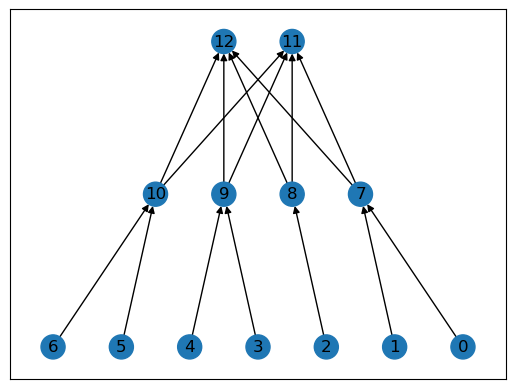

In [4]:
#example pedigrees
#id doesnt matter except for parent child relationships
ped_txt = """\
# id parent0 parent1 time
0 7 7 0.0
1 7 7 0.0
2 8 8 0.0
3 9 9 0.0
4 9 9 0.0
5 10 10 0.0
6 10 10 0.0
7 11 12 1.0
8 11 12 1.0
9 11 12 1.0
10 11 12 1.0
11 . . 2.0
12 . . 2.0
"""

pedigree = msprime.parse_pedigree(io.StringIO(ped_txt), sequence_length = 100)

draw_pedigree(pedigree.tree_sequence())

In [5]:
pedigree.tree_sequence()

In [6]:
#empty without ancestry and mutations
print(pedigree.tree_sequence().draw_text(y_axis=True, y_ticks=[0, 1, 2, 3, 4, 5]))

2.00┊                                 ┊ 
    ┊                                 ┊ 
1.00┊                                 ┊ 
    ┊                                 ┊ 
0.00┊ 0 1 2 3 4 5 6 7 8 9 10 11 12 13 ┊ 
    0                                100



In [10]:
#add ancestry simulations
ped_ts = msprime.sim_ancestry(
    initial_state=pedigree, model="fixed_pedigree", random_seed=41, recombination_rate = 0)

In [11]:
print(ped_ts.dump_tables())

TableCollection

Sequence Length: 100.0
Time units: generations
Metadata: b''

Individuals
╔══╤═════╤════════╤═══════╤═════════════════╗
║id│flags│location│parents│metadata         ║
╠══╪═════╪════════╪═══════╪═════════════════╣
║0 │    0│        │   7, 7│ {'file_id': '0'}║
║1 │    0│        │   7, 7│ {'file_id': '1'}║
║2 │    0│        │   8, 8│ {'file_id': '2'}║
║3 │    0│        │   9, 9│ {'file_id': '3'}║
║4 │    0│        │   9, 9│ {'file_id': '4'}║
║5 │    0│        │ 10, 10│ {'file_id': '5'}║
║6 │    0│        │ 10, 10│ {'file_id': '6'}║
║7 │    0│        │ 11, 12│ {'file_id': '7'}║
║8 │    0│        │ 11, 12│ {'file_id': '8'}║
║9 │    0│        │ 11, 12│ {'file_id': '9'}║
║10│    0│        │ 11, 12│{'file_id': '10'}║
║11│    0│        │ -1, -1│{'file_id': '11'}║
║12│    0│        │ -1, -1│{'file_id': '12'}║
╚══╧═════╧════════╧═══════╧═════════════════╝

Nodes
╔══╤═════╤══════════╤══════════╤════╤════════╗
║id│flags│population│individual│time│metadata║
╠══╪═════╪══════════╪═════

In [ ]:
ped_ts = msprime.sim_mutations(ped_ts, rate = 0.001, random_seed = 42)

In [ ]:
ped_ts.dump_tables().tree_sequence()

In [ ]:
#print ancestry
node_labels = {node.id: f"{node.individual}({node.id})" for node in ped_ts.nodes()}
#SVG(ped_ts.draw_svg(y_axis=True,  node_labels=node_labels, size=(1600,200)))

In [ ]:
ped_ts2 = msprime.sim_ancestry(initial_state = ped_ts, model = "dtwf", recombination_rate= 0.001, population_size = 13, random_seed = 42)
node_labels = {node.id: f"{node.individual}({node.id})" for node in ped_ts2.nodes()}
#SVG(ped_ts2.draw_svg(y_axis = True, node_labels = node_labels, size = (1600,600)))

In [ ]:
ped_ts2.tables.mutations

In [ ]:
#statistics
ped_ts.diversity(mode = "branch")

In [ ]:
ped_ts.sites()[1]

In [ ]:
[ped_ts.sites()[x] for x in range(0,len(ped_ts.sites()))]

In [ ]:
ped_ts2.breakpoints(as_array = True)

In [ ]:
#export ts
ped_ts.write_vcf(sys.stdout)

In [ ]:
segments = ped_ts.ibd_segments(store_pairs = True, store_segments = True)
for pair, value in segments.items():
    print(pair, "::", value)
print(segments)

In [ ]:
#load simulated chrom 21 from Trocmé et al on genes quebec
#ts = tszip.decompress("simulated_chrom_21.ts.tsz")

In [ ]:
#not enough memory on laptop
#print(ts.draw_text())

In [ ]:
#read genetic map
genmap = pd.read_csv("data/test_data/B73_genmap.csv")
#read parent genotypes
parent_genos = pd.read_csv("data/test_data/NAM_parent_genos.csv")
#read reference allele
ref_allele = pd.read_csv("data/test_data/B73_alleles.csv")

In [ ]:
#set up and simulation for 1 chromosome
#requires: genomic map, parent genotypes
#builds: arbitrary pedigree, founder nodes
#simulates: ARG based on pedigree and genomic map, offspring genotypes of pedigree based on ARG and parent genotypes

#simulate genotypes of one population combination (e.g. pop 1 (B73×B97)S5)
#sim ancestry with pedigree similar to pop (~150 offspring + 5 selfing genos)

#load genmap chr1 or load entire genmap and use chr column to reduce -> in full script loop over chr and concat geno_sims
genmap = pd.read_csv("data/test_data/B73_genmap_chr1.csv")
chr1_rate_map = get_rate_map(genmap)

#set up pedigree
pop_1_ped_df = cross_selfing_ped(offspring = 194, selfing_genos = 5)
pop_1_ped = df_to_ts(pop_1_ped_df, seq_len=297570924)
#load snp positions not strictly required since all information in genetic map 
#SNP_positions = pd.read_csv("data/test_data/NAM_SNP_positions.csv")

#reduce SNPs to chr1 of genetic map
#chr_1_SNP_positions = SNP_positions[SNP_positions["Marker"].isin(genmap["Marker"])]

#read parent genotypes
parent_genos = pd.read_csv("data/test_data/NAM_parent_genos.csv")

#choose which parents to cross
founder_nodes = get_founder_nodes(parent_genos, list(["B73", "B97"]))

#simulate chromosome 1
chr1_arg = msprime.sim_ancestry(initial_state = pop_1_ped, model="fixed_pedigree", recombination_rate = chr1_rate_map)

#propagate ARG recombinations to offspring genotypes
geno_sim = propagate_geno(chr1_arg, founder_nodes, genmap)

#join haploid offspring simulation nodes to diploid individuals
genotypes = join_nodes(chr1_arg, geno_sim)

#read reference allele
ref_allele = pd.read_csv("data/test_data/B73_alleles.csv")

#reduce ref_alleles to alleles in genmap
ref_allele = ref_allele[ref_allele["SNP"].isin(genmap["Marker"])]

#recode genotype values into additive encoding
geno_add = additive_encoding(ref_allele, genotypes)